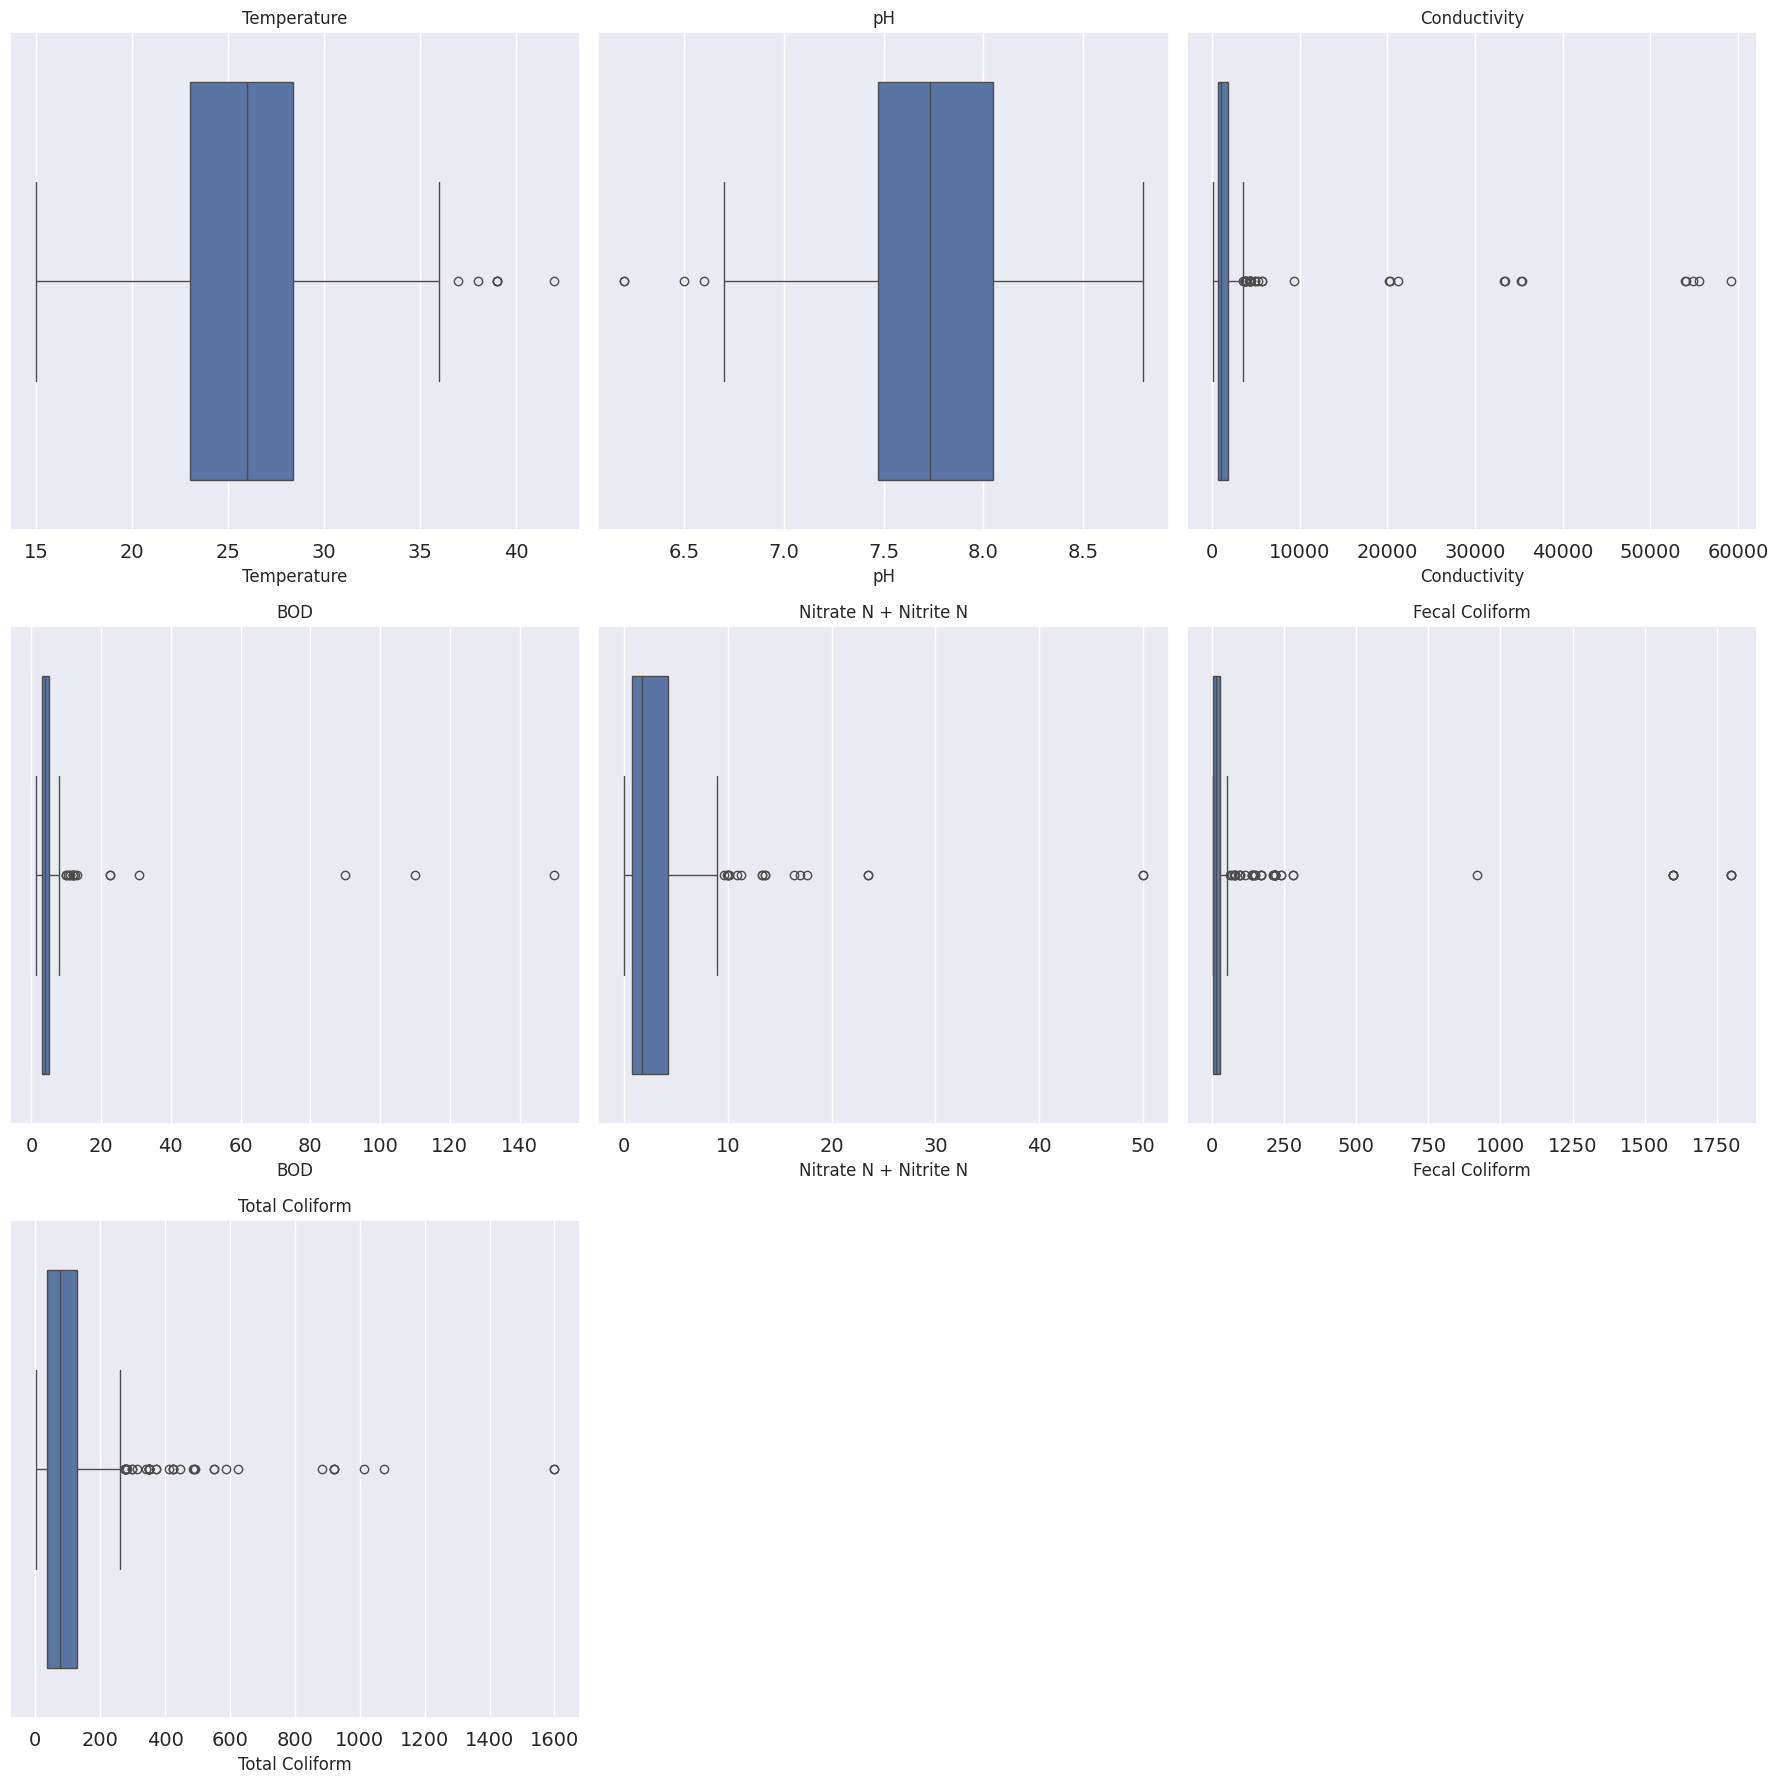

<Figure size 640x480 with 0 Axes>

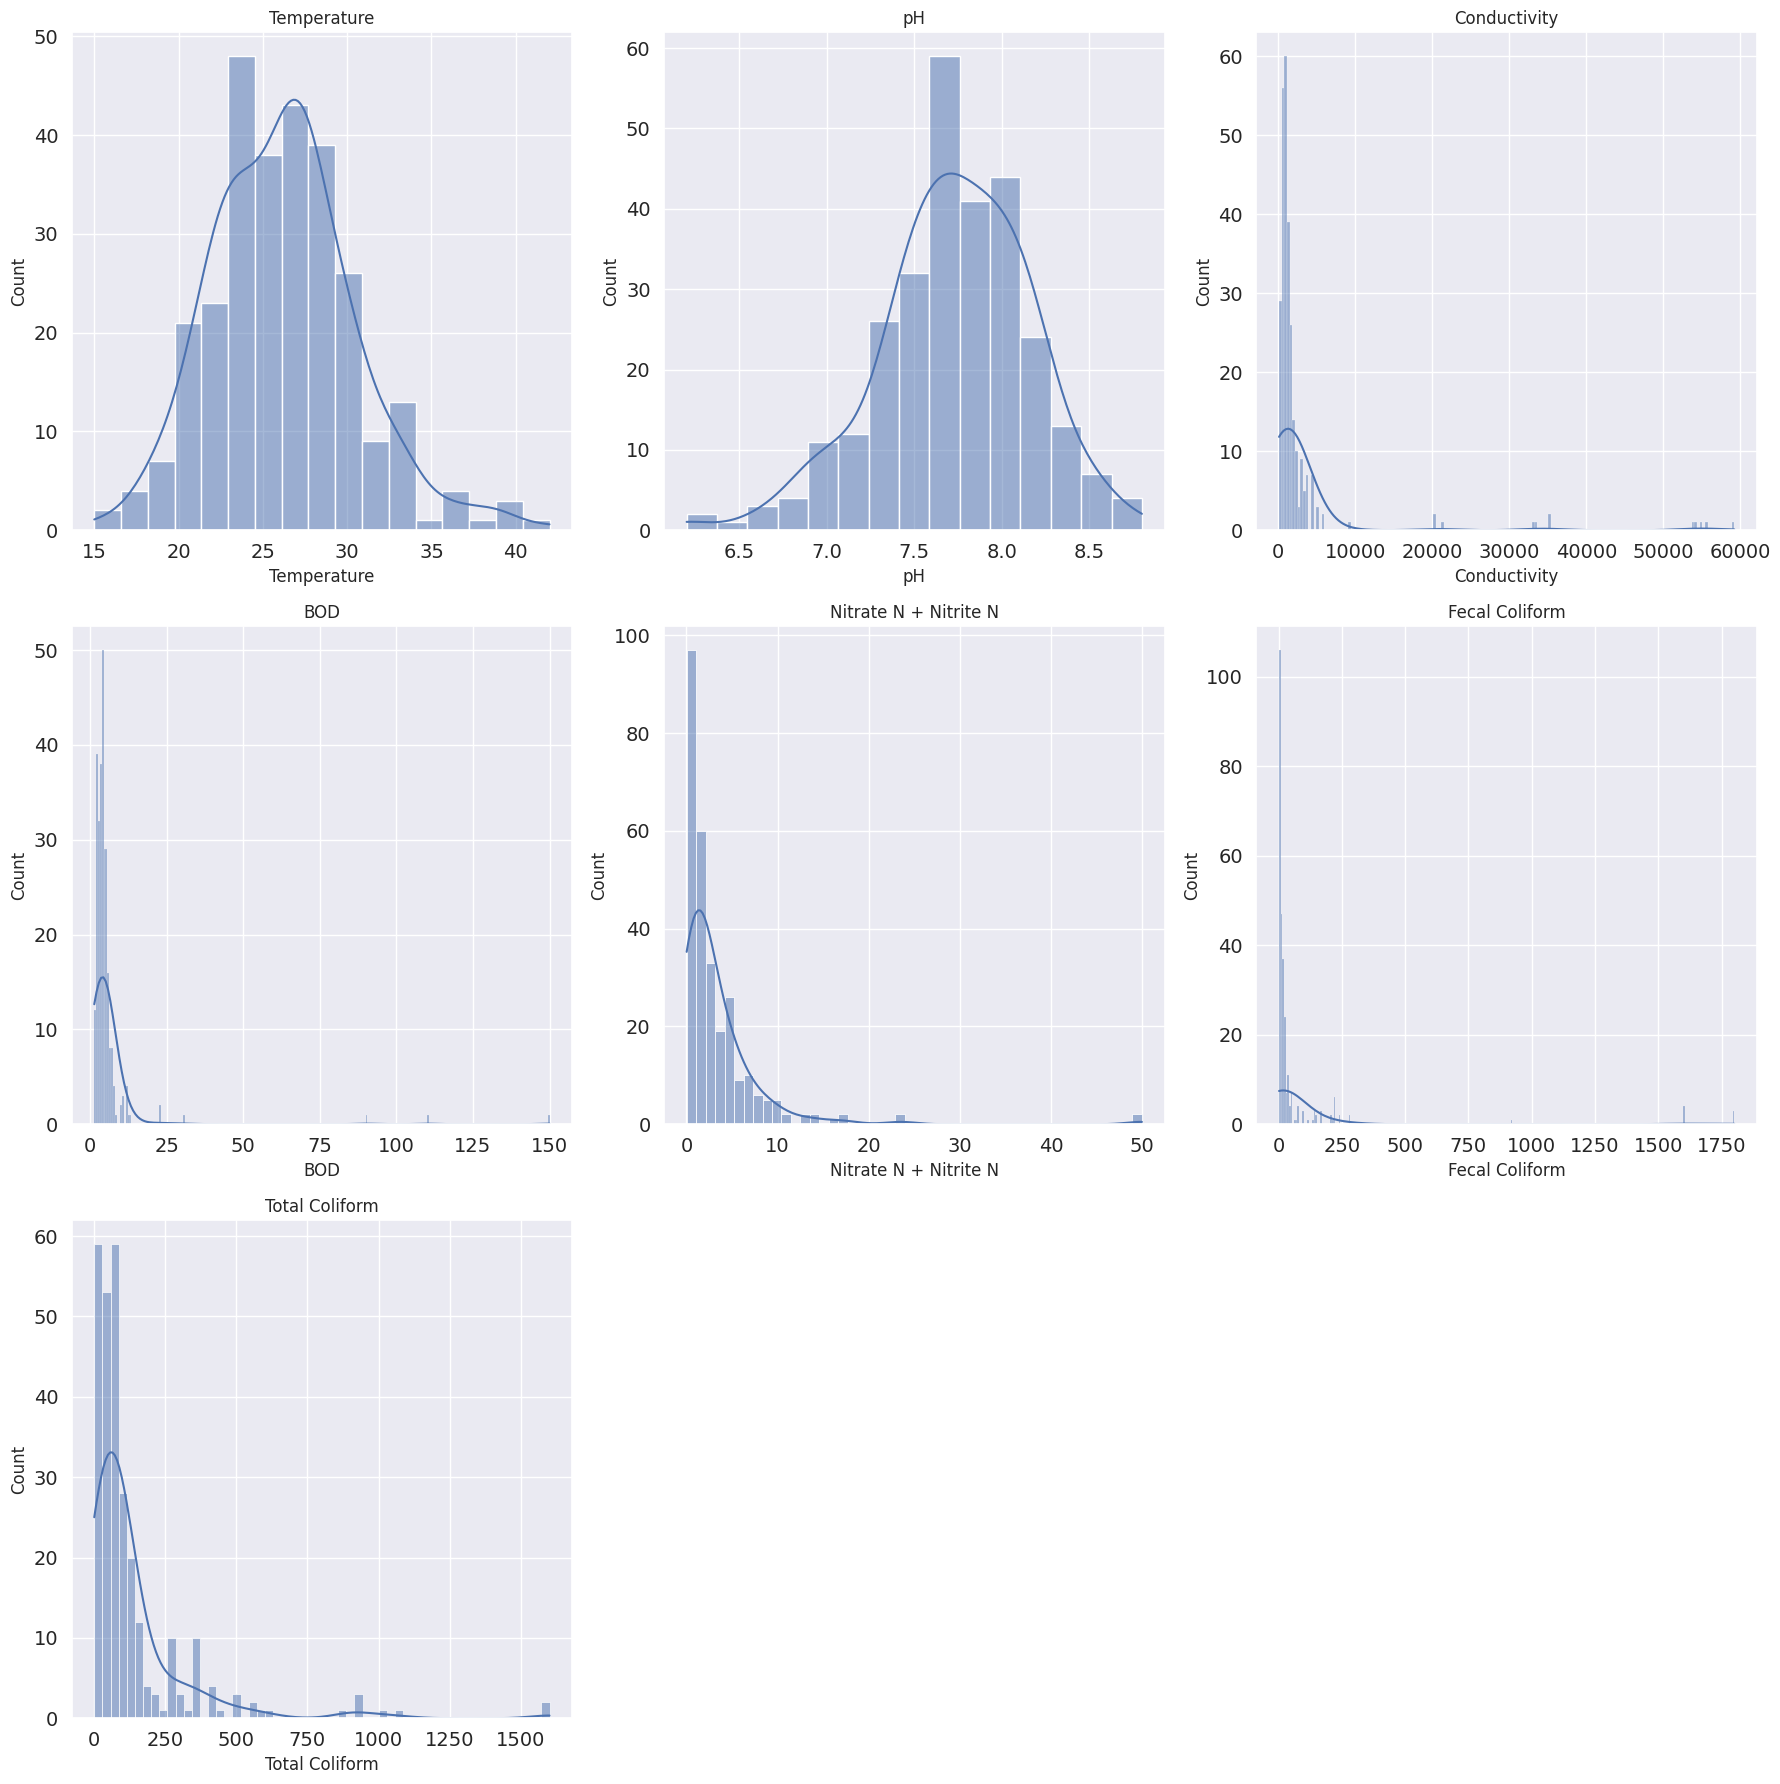

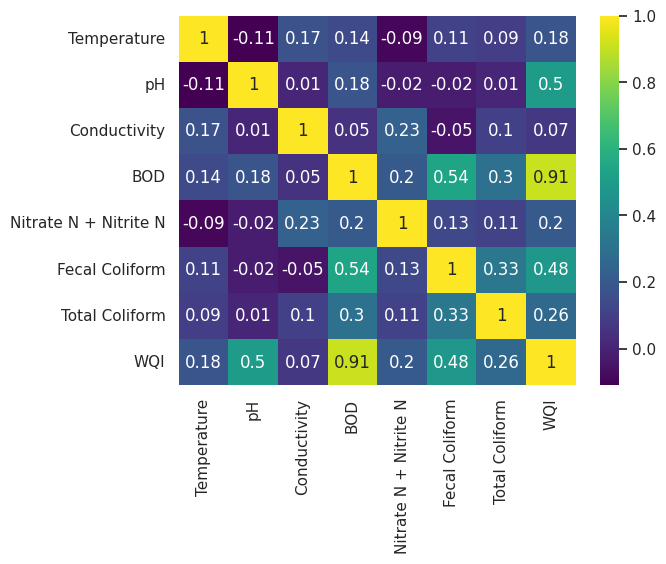

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


df = pd.read_excel('/content/Book 1 (1).xlsx')

#Qgis

stv = np.array([25,8.5,1000,5,45,100,1000])
K = 1/np.sum(stv)
w = [K/x for x in stv]
w_n = np.array([x/sum(w) for x in w])

idv = np.array([0,7,0,0,0,0,0])
diff = stv-idv
def calculate_wqi(row):
    q = 100*(row - idv)/diff
    return np.dot(q,w_n)


def avg(col1,col2):
    return (col1.to_numpy() + col2.to_numpy())/2

pd.set_option('mode.chained_assignment',None)
df = df.replace("   ",0)
df = df.replace(" ",0)
df = df.replace("-",0)

df_a = pd.DataFrame()

df_a["Temperature"] = avg(df["Min tem"],df["Max temp"])
df_a["pH"] = avg(df["Min pH"],df["Max pH"])
df_a["Conductivity"] = avg(df["Min Conductivity"],df["Max Conductivity"])
df_a["BOD"] = avg(df["Min BOD"],df["Max BOD"])
df_a["Nitrate N + Nitrite N"] = avg(df["Min Nitrate N + Nitrite N"],df["Max Nitrate N + Nitrite N"])
df_a["Fecal Coliform"] = avg(df["Min Fecal  Coliform"],df["Max Fecal  Coliform"])
df_a["Total Coliform"] = avg(df["Min Total  Coliform"],df["Max Total  Coliform"])



wqi = df_a.apply(calculate_wqi,axis=1)
df_a["WQI"] = wqi

df_a = df_a.replace(0,None)

df_a.dropna(inplace=True)

# fit and transform the data

#scaler = StandardScaler()

#normalized_data = scaler.fit_transform(df_a)


sns.set_theme()

def boxplot(feature):
    sns.boxplot(data=df_a,x=feature,orient='h')

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_a is already defined

def boxplot(feature, ax):
    sns.boxplot(data=df_a, x=feature, orient='h', ax=ax)
    ax.tick_params(axis='both', which='major', labelsize=14)

# List of features to plot
features = ["Temperature", "pH", "Conductivity", "BOD", "Nitrate N + Nitrite N", "Fecal Coliform", "Total Coliform"]

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through features and create a boxplot for each
for i, feature in enumerate(features):
    boxplot(feature, axes[i])
    axes[i].set_title(feature)  # Optional: set a title for each subplot

# Remove any unused subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a single image


# Display the image
plt.show()

plt.savefig('boxplot.png', dpi=300)


def histogram(feature, ax):
    sns.histplot(data=df_a, x=feature, kde=True, ax=ax)
    ax.tick_params(axis='both', which='major', labelsize=14)

# List of features to plot
features = ["Temperature", "pH", "Conductivity", "BOD", "Nitrate N + Nitrite N", "Fecal Coliform", "Total Coliform"]

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through features and create a histogram for each
for i, feature in enumerate(features):
    histogram(feature, axes[i])
    axes[i].set_title(feature)  # Optional: set a title for each subplot

# Remove any unused subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a single image

# Display the image
plt.show()
plt.savefig('histogram.png', dpi=300)

def water(row):
  if row["WQI"]<50:
    return "Excellent"
  if row["WQI"]>=50 and row["WQI"]<100:
    return "Good"
  if row["WQI"]>=100 and row["WQI"]<200:
    return "Poor"
  if row["WQI"]>=200 and row["WQI"]<300:
    return "Very poor"
  if row["WQI"]>=300:
    return "Unsuitable for drinking"

types = df_a.apply(water, axis = 1)
df_a["Type"] = types

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

ncols = ["Temperature","pH","Conductivity","BOD","Nitrate N + Nitrite N","Fecal Coliform","Total Coliform"]
X,y = df_a[ncols],df_a["WQI"]
X_trained,X_tested,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)


s = MinMaxScaler()
X_train_ = s.fit_transform(X_trained)
X_test_ = s.transform(X_tested)
#df_a = s.fit_transform(df_a)

sdf = pd.DataFrame(X_train_,columns=ncols)
sdf["WQI"] = pd.Series(y_train).values

#from sklearn.decomposition import PCA
#pca = PCA(n_components=3)
#pca.fit_transform(df_a)

cmatrix = sdf.corr(method='spearman').round(2)
sns.heatmap(cmatrix,annot=True, cmap = "viridis")




#print(sum(pca.explained_variance_ratio_))

# import numpy as np
# nums = np.arange(7)


# var_ratio = []
# for num in nums:
#   pca = PCA(n_components=num)
#   pca.fit(df_a)
#   var_ratio.append(np.sum(pca.explained_variance_ratio_))

# import matplotlib.pyplot as plt

# plt.figure(figsize=(4,2),dpi=150)
# plt.grid()
# plt.plot(nums,var_ratio,marker='o')
# plt.xlabel('n_components')
# plt.ylabel('Explained variance ratio')
# plt.title('n_components vs. Explained Variance Ratio')

In [ ]:
selected_features = [1,3,5] # pH, BOD, Fecal coliform
del_ft = [0,2,4,6]
x,Y = df_a[ncols],df_a["Type"]
X_train,X_test,y_train,y_test = train_test_split(x,Y,test_size=0.2,random_state=10)

X,y = df_a[ncols],df_a["WQI"]
x_train,x_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)



X_train_ = np.delete(X_train.values, del_ft, axis=1)
X_test_ = np.delete(X_test.values, del_ft, axis=1)

from sklearn.preprocessing import StandardScaler


s = StandardScaler()
x_train = s.fit_transform(X_train_)
x_test = s.transform(X_test_)

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

reg = LassoCV(cv=5,random_state=10).fit(x_train,Y_train)
y_hat = reg.predict(x_test)
print(f"MSE: {mean_squared_error(Y_test,y_hat,squared = False)}")
print(f"R2 : {r2_score(Y_test,y_hat)}")
rmse = np.sqrt(mean_squared_error(Y_test,y_hat,squared = False))
print("RMSE: ", rmse)
print(f"MAE: {mean_absolute_error(Y_test,y_hat)}")

MSE: 2.4331081402283012
R2 : 0.9884706205762621
RMSE:  1.559842344670865
MAE: 1.7935159112951617


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

reg = RidgeCV(cv=5).fit(x_train,Y_train)
y_hat = reg.predict(x_test)
print(f"MSE: {mean_squared_error(Y_test,y_hat,squared = False)}")
print(f"R2 : {r2_score(Y_test,y_hat)}")
rmse = np.sqrt(mean_squared_error(Y_test,y_hat,squared = False))
print("RMSE: ", rmse)
print(f"MAE: {mean_absolute_error(Y_test,y_hat)}")

MSE: 2.4548890491506654
R2 : 0.9882632772530979
RMSE:  1.566808555360439
MAE: 1.7619234883306745


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

mod = LinearRegression()
reg = mod.fit(x_train,Y_train)
y_hat = mod.predict(x_test)
print(f"MSE: {mean_squared_error(Y_test,y_hat,squared = False)}")
print(f"R2 : {r2_score(Y_test,y_hat)}")
rmse = np.sqrt(mean_squared_error(Y_test,y_hat,squared = False))
print("RMSE: ", rmse)
print(f"MAE: {mean_absolute_error(Y_test,y_hat)}")



MSE: 2.422959050834025
R2 : 0.9885666036985862
RMSE:  1.5565857030160675
MAE: 1.753658815002845


In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

mod = ElasticNetCV()
reg = mod.fit(x_train,Y_train)
y_hat = mod.predict(x_test)
print(f"MSE: {mean_squared_error(Y_test,y_hat,squared = False)}")
print(f"R2 : {r2_score(Y_test,y_hat)}")
rmse = np.sqrt(mean_squared_error(Y_test,y_hat,squared = False))
print("RMSE: ", rmse)
print(f"MAE: {mean_absolute_error(Y_test,y_hat)}")

MSE: 38.411963706758634
R2 : -1.8735325966593548
RMSE:  6.197738596194473
MAE: 18.547824483264993


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r = GradientBoostingRegressor()
reg = r.fit(x_train,Y_train)
y_hat = reg.predict(x_test)
print(f"MSE: {mean_squared_error(Y_test,y_hat,squared = False)}")
print(f"R2 : {r2_score(Y_test,y_hat)}")
rmse = np.sqrt(mean_squared_error(Y_test,y_hat,squared = False))
print("RMSE: ", rmse)
print(f"MAE: {mean_absolute_error(Y_test,y_hat)}")

MSE: 4.758611360572273
R2 : 0.9558994929851936
RMSE:  2.1814241587944956
MAE: 2.226967410608669


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r = RandomForestRegressor()
reg = r.fit(x_train,Y_train)
y_hat = reg.predict(x_test)
print(f"MSE: {mean_squared_error(Y_test,y_hat,squared = False)}")
print(f"R2 : {r2_score(Y_test,y_hat)}")
rmse = np.sqrt(mean_squared_error(Y_test,y_hat,squared = False))
print("RMSE: ", rmse)
print(f"MAE: {mean_absolute_error(Y_test,y_hat)}")

MSE: 9.384518124403145
R2 : 0.8284830429316667
RMSE:  3.0634160873774796
MAE: 3.527357949097701


In [ ]:
from sklearn import svm
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r = svm.SVR()
reg = r.fit(x_train,Y_train)
y_hat = reg.predict(x_test)
print(f"MSE: {mean_squared_error(Y_test,y_hat,squared = False)}")
print(f"R2 : {r2_score(Y_test,y_hat)}")
rmse = np.sqrt(mean_squared_error(Y_test,y_hat,squared = False))
print("RMSE: ", rmse)
print(f"MAE: {mean_absolute_error(Y_test,y_hat)}")

MSE: 22.6556050794687
R2 : 0.00038114404217448605
RMSE:  4.759790444911277
MAE: 16.811535278286836


In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,mean_squared_error

model = svm.SVC(kernel = 'linear').fit(X_train_,y_train)
pred_svm = model.predict(X_test_)
SVM = metrics.accuracy_score(y_test, pred_svm)
p = precision_score(y_test, pred_svm, average='macro')
r = recall_score(y_test, pred_svm, average='macro')
f1 = f1_score(y_test, pred_svm, average='macro')

print('SVM: ', SVM)
print('Precision: ', p)
print('Recall: ', r)
print('F1: ', f1)
#y_hat = model.predict(X_test_)
#print(f"RMSE: {mean_squared_error(y_test,y_hat,squared=False)}")
#print(f"R2 : {r2_score(y_test,y_hat)}")


SVM:  0.9298245614035088
Precision:  0.6189024390243902
Recall:  0.6339285714285714
F1:  0.6229514330614383


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

rf = RandomForestClassifier().fit(X_train_, y_train)
pred_rf = rf.predict(X_test_)
RandomForest = metrics.accuracy_score(y_test, pred_rf)
p = precision_score(y_test, pred_rf, average='macro')
r = recall_score(y_test, pred_rf, average='macro')
f1 = f1_score(y_test, pred_rf, average='macro')

print("Random Forest: ", RandomForest)
print('Precision: ', p)
print('Recall: ', r)
print('F1: ', f1)
y_hat = model.predict(X_test_)

Random Forest:  0.9298245614035088
Precision:  0.8174603174603176
Recall:  0.8452380952380952
F1:  0.8267770876466529


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

mode = SGDClassifier()
mode.fit(X_train_, y_train)
pred_sdg = mode.predict(X_test_)
SDG = metrics.accuracy_score(y_test, pred_sdg)
p = precision_score(y_test, pred_sdg, average='macro')
r = recall_score(y_test, pred_sdg, average='macro')
f1 = f1_score(y_test, pred_sdg, average='macro')

print("Stochastic gradient descent: ", SDG)
print('Precision: ', p)
print('Recall: ', r)
print('F1: ', f1)

Stochastic gradient descent:  0.5964912280701754
Precision:  0.300709219858156
Recall:  0.373015873015873
F1:  0.33052434456928836


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

mo = DecisionTreeClassifier()
mo.fit(X_train_, y_train)
pred_dt = mo.predict(X_test_)
DT = metrics.accuracy_score(y_test, pred_dt)
p = precision_score(y_test, pred_dt, average='macro')
r = recall_score(y_test, pred_dt, average='macro')
f1 = f1_score(y_test, pred_dt, average='macro')

print("Decision Tree: ", DT)
print('Precision: ', p)
print('Recall: ', r)
print('F1: ', f1)

Decision Tree:  0.9824561403508771
Precision:  0.9922480620155039
Recall:  0.8888888888888888
F1:  0.9294117647058823


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

mol = GradientBoostingClassifier()
mol.fit(X_train_, y_train)
pred_gbc = mol.predict(X_test_)
XGB = metrics.accuracy_score(y_test, pred_gbc)
p = precision_score(y_test, pred_gbc, average='macro')
r = recall_score(y_test, pred_gbc, average='macro')
f1 = f1_score(y_test, pred_gbc, average='macro')

print("XGBoost: ", XGB)
print('Precision: ', p)
print('Recall: ', r)
print('F1: ', f1)

XGBoost:  0.9473684210526315
Precision:  0.8252032520325203
Recall:  0.873015873015873
F1:  0.8450946643717728


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

m = LogisticRegression(multi_class = "ovr")
m.fit(X_train_, y_train)
pred_lr = m.predict(X_test_)
LR = metrics.accuracy_score(y_test, pred_lr)
p = precision_score(y_test, pred_lr, average='macro')
r = recall_score(y_test, pred_lr, average='macro')
f1 = f1_score(y_test, pred_lr, average='macro')

print("Logistic Regression: ", LR)
print('Precision: ', p)
print('Recall: ', r)
print('F1: ', f1)

Logistic Regression:  0.8070175438596491
Precision:  0.9308176100628932
Recall:  0.5277777777777778
F1:  0.5947368421052631


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

models = KNeighborsClassifier()
models.fit(X_train_, y_train)
pred_knn = models.predict(X_test_)
KNN = metrics.accuracy_score(y_test, pred_knn)
p = precision_score(y_test, pred_knn, average='macro')
r = recall_score(y_test, pred_knn, average='macro')
f1 = f1_score(y_test, pred_knn, average='macro')

print("KNN: ", KNN)
print('Precision: ', p)
print('Recall: ', r)
print('F1: ', f1)

KNN:  0.8245614035087719
Precision:  0.8492753623188406
Recall:  0.615079365079365
F1:  0.6742424242424243


In [ ]:
#ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))index = 0ax = ax.flatten()for col, value in df.items():sns.boxplot(y=col, data=df, ax=ax[index])index += 1plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
#testing classification accuracy
# from sklearn.metrics import accuracy_score,confusion_matrix

# def classify(y):
#     y_c = np.zeros_like(y,dtype=int)
#     for i in range(len(y)):
#         if y[i] < 50:
#             y_c[i] = 0
#         elif y[i] < 100:
#             y_c[i] = 1
#         elif y[i] < 200:
#             y_c[i] = 2
#         elif y[i] < 300:
#             y_c[i] = 3
#         else:
#             y_c[i] = 4
#     return y_c

# y_c = classify(y_test.to_numpy())
# y_c_hat = classify(y_hat)

# print(f'Accuracy = {accuracy_score(y_c,y_c_hat)}')
# cm = confusion_matrix(y_c,y_c_hat)
# sns.heatmap(cm,annot=True)
# plt.ylabel('True Labels')
# plt.xlabel('Predicted Labels')
# plt.show()